In [1]:
import re
import tweepy
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# keys and tokens from the Twitter Dev Console
consumer_key = 'UPnncVfZPSqjZo5c8YeJEUrUz'
consumer_secret = 'auB2RIDAhcXmZBxRXjR7YALD5lFCJHNabEjeywTN4Qju3PwmFG'
access_token = '987462390-Xyaq4zPncj6SRz15JR9bdYlJQY6MKQUEcE8fCtRm'
access_token_secret = 'SqwAKFbYA5337MqijRUnsUP6kQOnTOFlQ2zBMrRTlbUHc'

username = "BillGates"

# attempt authentication
try:
    # create OAuthHandler object
    auth = OAuthHandler(consumer_key, consumer_secret)
    # set access token and secret
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets
    api = tweepy.API(auth)
except:
    print("Error: Authentication Failed")

In [3]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name=username, count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @gatesfoundation: As our CEO @MSuzman says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2) https://t.co/padmHSgWGc

3) RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

4) I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

5) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you @POTUS for your leadership. https://t.co/SVeKp1KPHT



In [4]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"RT @gatesfoundation: As our CEO @MSuzman says,..."
1,https://t.co/padmHSgWGc
2,"RT @WHO: The @ACTAccelerator, an unprecedented..."
3,I was honored to speak at today’s #LeadersClim...
4,Ambitious short-term goals like this are criti...


In [5]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,": As our CEO says, no barriers should stand i..."
1,
2,": The , an unprecedented global alliance to de..."
3,I was honored to speak at today’s LeadersClima...
4,Ambitious short-term goals like this are criti...
...,...
95,Standing up for science has never been more im...
96,I've known and learned from for more than 40 ...
97,This book has nothing to do with viruses or pa...
98,Monoclonal antibodies are one of the most prom...


In [6]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,": As our CEO says, no barriers should stand i...",1.000000,0.500000
1,,0.000000,0.000000
2,": The , an unprecedented global alliance to de...",0.450000,0.300000
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000
4,Ambitious short-term goals like this are criti...,0.668750,0.062500
...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000
96,I've known and learned from for more than 40 ...,0.550000,0.425000
97,This book has nothing to do with viruses or pa...,0.966667,0.600000
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857


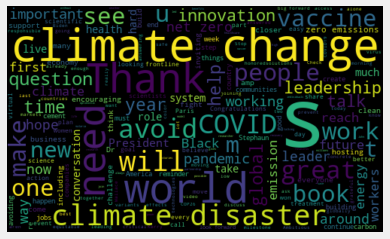

In [7]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": As our CEO says, no barriers should stand i...",1.000000,0.500000,Positive
1,,0.000000,0.000000,Neutral
2,": The , an unprecedented global alliance to de...",0.450000,0.300000,Positive
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000,Neutral
4,Ambitious short-term goals like this are criti...,0.668750,0.062500,Positive
...,...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000,Positive
96,I've known and learned from for more than 40 ...,0.550000,0.425000,Positive
97,This book has nothing to do with viruses or pa...,0.966667,0.600000,Positive
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857,Positive


In [9]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) : As our CEO  says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2) : The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

3) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. 

4) It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. 

5) Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black people experience daily.  I hope we will continue to make real progress on this.

6) “T

In [10]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) : Black folks have 

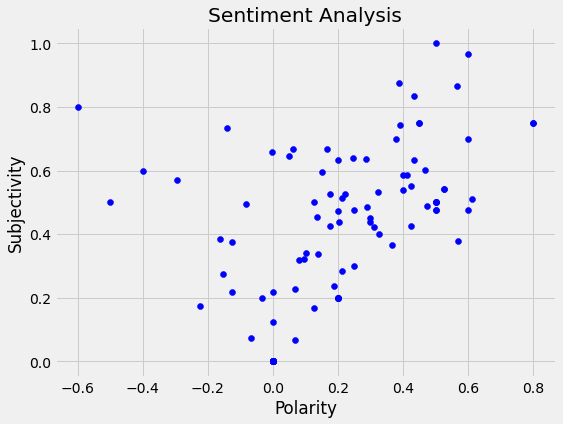

In [11]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [12]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

69.0

In [13]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

14.0

In [14]:
# Show the value counts
df['Analysis'].value_counts()

Positive    69
Neutral     17
Negative    14
Name: Analysis, dtype: int64

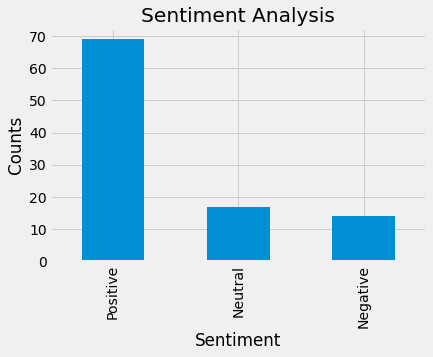

In [15]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [17]:
# Preparing CSV files

user = api.get_user(username)
user_id = user.id_str

status = 'neutral'
if((100 - len(ptweets) - len(ntweets)) <= len(ptweets) or (100 - len(ptweets) - len(ntweets)) <= len(ntweets)):
    if(len(ptweets) >= len(ntweets)):
        status = 'positive'
    else:
        status = 'negative'

diccionario = {'user_id': [user_id], 'user_name': [username], 'status': [status]}

df_user = pd.DataFrame(diccionario)

df_user.to_csv('userSentiment.csv', header=True, index=False)